# Скачиваем данные 

In [10]:
!pip install pymorphy2

You should consider upgrading via the '/Users/ulianavinogradova/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import multiprocessing
from gensim.models import Word2Vec
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pymorphy2
from sklearn.metrics import f1_score
import re

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# ! cp drive/MyDrive/all-repetitors-utf8.json /content/

In [13]:
df = pd.read_json('all-repetitors-utf8.json')

In [14]:
df

,url,name,subjects,mainInfo,rating,comments,cash,certification,discount,grayInfo,video,additionalInfo,awards,prices,documents
0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,Репетитор по химии.,"[Образование:, • Химический факультет МГУ им. ...",5++,125 отзывов,Средняя ставка от ~ 2000 руб. / час,1,\n\n,"[Район: Менделеевская, Белорусская., Плюс: дис...",True,[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ..."
1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,Репетитор по математике.,"[Образование:, • МГУ им. М.В. Ломоносова, меха...",5++,198 отзывов,Средняя ставка от ~ 1000 руб. / час,1,\n\n,"[Сертификация по математике пройдена., Район: ...",True,"[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф..."
2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,Репетитор по биологии и химии.,"[Опыт:, • Стаж педагогической деятельности — 2...",5++,158 отзывов,Средняя ставка от ~ 2000 руб. / час,1,\n\n,"[Район: Серпуховская., Плюс: внутренний экзаме...",True,[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]"
3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,Репетитор по высшей математике.,"[Образование:, • МГУ им. М.В. Ломоносова, меха...",5++,164 отзыва,Средняя ставка от ~ 1333 руб. / час,1,\n\n,"[Сертификация по математике пройдена., Район: ...",True,[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[]
4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,Репетитор по венгерскому языку.,"[Образование:, • Профессиональный институт упр...",5++,53 отзыва,Средняя ставка от ~ 1500 руб. / час,1,\n\n,"[Плюс: дистанционные занятия., Ставка: 1500 ру...",True,"[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107770,https://repetitors.info/repetitor/?p=SidorkinaAA4,Сидоркина Анастасия Анатольевна,"Предметы: математика, русский язык, начальная ...",[Студентка 3 курса МГТУ им. Н.Э. Баумана.],"2,9",1 отзыв,Средняя ставка от ~ 660 руб. / час,0,\n\n,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",False,[],[],[[Выгул собак](/predmet/vygul-sobak/)\n\n| — ...,[]
107771,https://repetitors.info/repetitor/?p=Yakovleva...,Яковлева Анастасия Владимировна,Репетитор по английскому языку и испанскому яз...,"[МГЛУ, переводческий факультет, переводчик анг...","2,7",2 отзыва,Средняя ставка от ~ 1000 руб. / час,0,\n\n,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",False,[],[],[[Английский язык](/repetitor/english/)\n\n| ...,[]
107772,https://repetitors.info/repetitor/?p=LiskoTU,Лискова Татьяна Юрьевна,"Предметы: физика, высшая математика, математика.",[Образование: Мурманский государственный педаг...,"2,8",10 отзывов,Средняя ставка от ~ 800 руб. / час,1,\n\n,"[Район: Куровское. Выезд: Центр, Юго-Восток, З...",False,[],[],[[Математика](/repetitor/maths/)\n\n| 800 руб...,[Диплом Мурманского государственного педагогич...
107773,https://repetitors.info/repetitor/?p=KomolovaTV,Комолова Татьяна Владимировна,"Предметы: математика, русский язык, подготовка...",[Образование: Московский государственный униве...,"3,6",1 отзыв,Средняя ставка от ~ 500 руб. / час,0,\n\n,[Район: Павловский Посад. Выезд: Павловский По...,False,[],[],[[Математика](/repetitor/maths/)\n\n| 500-700...,[]


In [15]:
pd.unique(df['certification'])

array([1, 0])

In [16]:
df_cut = df.drop(columns = ['comments', 'video'])

In [17]:
df_cut['subjects'] = df_cut['subjects'].fillna('')
df_cut['discount'] = df_cut['discount'].fillna('')
df_cut['subjects'] = df_cut['subjects'].str.replace('.', ',')
df_cut['subjects'] = df_cut['subjects'].str.replace(' и ', ',')
df_cut['subjects'] = df_cut['subjects'].str.lower()
df_cut = df_cut[df_cut['subjects'].str.contains('предмет') | df_cut['subjects'].str.contains('репетитор')].reset_index()

In [18]:
df_cut

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",5++,Средняя ставка от ~ 2000 руб. / час,1,\n\n,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",5++,Средняя ставка от ~ 1000 руб. / час,1,\n\n,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",5++,Средняя ставка от ~ 2000 руб. / час,1,\n\n,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]"
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",5++,Средняя ставка от ~ 1333 руб. / час,1,\n\n,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[]
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","[Образование:, • Профессиональный институт упр...",5++,Средняя ставка от ~ 1500 руб. / час,1,\n\n,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104759,107770,https://repetitors.info/repetitor/?p=SidorkinaAA4,Сидоркина Анастасия Анатольевна,"предметы: математика, русский язык, начальная ...",[Студентка 3 курса МГТУ им. Н.Э. Баумана.],"2,9",Средняя ставка от ~ 660 руб. / час,0,\n\n,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",[],[],[[Выгул собак](/predmet/vygul-sobak/)\n\n| — ...,[]
104760,107771,https://repetitors.info/repetitor/?p=Yakovleva...,Яковлева Анастасия Владимировна,"репетитор по английскому языку,испанскому языку,","[МГЛУ, переводческий факультет, переводчик анг...","2,7",Средняя ставка от ~ 1000 руб. / час,0,\n\n,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",[],[],[[Английский язык](/repetitor/english/)\n\n| ...,[]
104761,107772,https://repetitors.info/repetitor/?p=LiskoTU,Лискова Татьяна Юрьевна,"предметы: физика, высшая математика, математика,",[Образование: Мурманский государственный педаг...,"2,8",Средняя ставка от ~ 800 руб. / час,1,\n\n,"[Район: Куровское. Выезд: Центр, Юго-Восток, З...",[],[],[[Математика](/repetitor/maths/)\n\n| 800 руб...,[Диплом Мурманского государственного педагогич...
104762,107773,https://repetitors.info/repetitor/?p=KomolovaTV,Комолова Татьяна Владимировна,"предметы: математика, русский язык, подготовка...",[Образование: Московский государственный униве...,"3,6",Средняя ставка от ~ 500 руб. / час,0,\n\n,[Район: Павловский Посад. Выезд: Павловский По...,[],[],[[Математика](/repetitor/maths/)\n\n| 500-700...,[]


# Обработка strip

In [19]:
for col in tqdm(df_cut.columns):
    if df_cut[col].dtypes == 'object':
        if type(df_cut[col][0]) != list:
            df_cut[col] = df_cut[col].str.strip()

In [21]:
df_cut.head()

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",5++,Средняя ставка от ~ 2000 руб. / час,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",5++,Средняя ставка от ~ 1000 руб. / час,1,,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",5++,Средняя ставка от ~ 2000 руб. / час,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]"
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",5++,Средняя ставка от ~ 1333 руб. / час,1,,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[]
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","[Образование:, • Профессиональный институт упр...",5++,Средняя ставка от ~ 1500 руб. / час,1,,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда..."


# Обработка rating

In [22]:
df_cut.loc[df_cut['rating'] == '5+', 'rating'] = '5.5' 
df_cut.loc[df_cut['rating'] == '5++', 'rating'] = '6' # 
df_cut.loc[pd.isnull(df_cut['rating']) == True, 'rating'] = '0'
df_cut['rating'] = df_cut['rating'].str.replace(',', '.')

In [23]:
pd.unique(df_cut['rating'])

array(['6', '5.5', '4.9', '5.0', '4.8', '4.7', '4.6', '4.5', '4.4', '4.3',
       '0', '4.2', '4.1', '4.0', '3.6', '3.7', '3.8', '3.9', '3.5', '3.4',
       '3.3', '3.2', '3.1', '3.0', '2.9', '2.8', '2.7', '2.6', '2.3',
       '2.4', '2.5', '2.1', '2.0', '2.2'], dtype=object)

In [24]:
df_cut['rating'] = df_cut['rating'].astype(float)

In [25]:
df_cut.head()

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",6.0,Средняя ставка от ~ 2000 руб. / час,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,Средняя ставка от ~ 1000 руб. / час,1,,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",6.0,Средняя ставка от ~ 2000 руб. / час,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]"
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,Средняя ставка от ~ 1333 руб. / час,1,,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[]
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","[Образование:, • Профессиональный институт упр...",6.0,Средняя ставка от ~ 1500 руб. / час,1,,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда..."


# Обработка CASH

In [26]:
d = df_cut.copy()

In [27]:
# df_cut['cash'].isna().any()
df_cut['cash'] = df_cut['cash'].fillna('')

In [28]:
df_cut[(~df_cut['cash'].str.contains('руб. / ч')) & (df_cut['cash'] != '')]

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents


In [29]:
df_cut['cash'] = df_cut['cash'].str.replace('[r"\D+"]', '')

In [30]:
df_cut.loc[df_cut['cash'] != '', 'cash']

0         2000
1         1000
2         2000
3         1333
4         1500
          ... 
104759     660
104760    1000
104761     800
104762     500
104763    3000
Name: cash, Length: 102260, dtype: object

# Обработка prices

In [31]:
# checkpoint

# df_cut_old = df_cut.copy() 

In [32]:
# checkpoint

# df_cut = df_cut_old.copy()

In [33]:
prev_cash = 0
for i in tqdm(range(0, df_cut.shape[0])):
    prices = {}
    for price in df_cut.prices[i]:
        temp = price.replace('\n', '')
        left = temp.find('[')
        right = temp.find(']')
        if left == -1 or right == -1:
            subj = temp.split('|')[0]
        else:
            subj = temp[left + 1: right]

        if temp.find('— // —') != -1:
            prices[subj] = prev_cash
        else:
            cashes = np.array(re.findall(r'\d+-\d+ руб. / [ч|\d+]*|\d+ руб. / [ч|\d+]*', temp))
            if len(cashes) == 0:
                continue
            for c in range(0, len(cashes)):
                all_money = cashes[c].split(' ')
                if '-' in all_money[0]:
                    money = np.array(all_money[0].split('-'), dtype=int).min()
                    all_money[0] = str(money)
                if all_money[-1].isdigit():
                    all_money.append('мин')
                all_money = ' '.join(all_money)

                if subj not in prices:
                    prices[subj] = []
                prices[subj].append(all_money)


        prev_cash = prices[subj]
#     print(prices)
    df_cut.loc[i, 'price_list'] = [prices]

In [34]:
df_cut.loc[10100, 'price_list']

{'Английский язык': ['1500 руб. / ч'],
 'Business English': ['1500 руб. / ч'],
 'Английский для маркетинга': ['1500 руб. / ч'],
 'Английский для путешествий': ['1500 руб. / ч'],
 'Медицинский английский': ['1500 руб. / ч'],
 'Общий английский': ['1500 руб. / ч'],
 'Экономический английский': ['1500 руб. / ч'],
 'PET': ['1700 руб. / ч'],
 'Маркетинг': ['1700 руб. / ч'],
 'Менеджмент': ['1700 руб. / ч'],
 'Переводчики': ['1700 руб. / ч'],
 'Перевод с английского': ['1700 руб. / ч'],
 'Работа с текстами': ['1700 руб. / ч'],
 'Выезд': ['1533 руб. / ч'],
 'Групповые занятия': ['1533 руб. / ч'],
 'В паре': ['1533 руб. / ч'],
 'Мини-группа': ['1533 руб. / ч'],
 'Дистанционно (Скайп)': ['1000 руб. / 45 мин']}

# Образование

In [36]:
text_education_prep = []

In [37]:
for ind in tqdm(range(0, len(df_cut))):
    flag = 0
    for info in df_cut.loc[ind, 'mainInfo']:
        if 'образование:' in info.lower():
            flag = 1
        elif ':' in info.lower():
            flag = 0
        if flag == 2:
            text_education_prep.append(info)
        if flag == 1:
            flag += 1

In [38]:
text_education = []
for exp in text_education_prep:
    text_education.append(exp.lower().replace('• ', '').replace('опыт', ''))

# Доп информация

In [45]:
from tqdm import tqdm

In [46]:
text_add_prep = []
for ind in tqdm(range(0, len(df_cut))):
    flag = 0
    for info in df_cut.loc[ind, 'grayInfo']:
        if 'опыт' in info.lower() or 'образование' in info.lower() or 'выезд' in info.lower() or 'район' in info.lower() or 'окончил' in info.lower() or 'работал' in info.lower():
            flag = 0
        else:
            symb = info.find(':')
            if symb != -1:
                info = info[symb + 1:]
                if len(re.findall(r'\d+', info)) != 0:
                    continue
                text_add_prep.append(info)
            else:
                if len(re.findall(r'\d+', info)) != 0:
                    continue
                text_add_prep.append(info)

100%|██████████| 104764/104764 [00:02<00:00, 43161.14it/s]


In [47]:
for ind in tqdm(range(0, len(df_cut))):
    flag = 0
    for info in df_cut.loc[ind, 'additionalInfo']:
        if 'опыт' in info.lower() or 'образование' in info.lower() or 'выезд' in info.lower() or 'район' in info.lower() or 'окончил' in info.lower() or 'работал' in info.lower():
            flag = 0
        else:
            symb = info.find(':')
            if symb != -1:
                info = info[symb + 1:]
                if len(re.findall(r'\d+', info)) != 0:
                    continue
                text_add_prep.append(info.strip())
            else:
                if len(re.findall(r'\d+', info)) != 0:
                    continue
                text_add_prep.append(info.strip())

100%|██████████| 104764/104764 [00:00<00:00, 116519.44it/s]


In [48]:
text_add_prep = np.array(text_add_prep)
text_add_prep = text_add_prep[text_add_prep != '']
text_add_prep[:30]

array([' дистанционные занятия.', 'Сертификация по математике пройдена.',
       ' внутренний экзамен (ДВИ) по биологии в МГУ и медицинские вузы.',
       'Сертификация по математике пройдена.', ' дистанционные занятия.',
       ' дистанционные занятия.', 'Сертификация по математике пройдена.',
       ' дистанционные занятия; ООП.',
       ' философия на английском языке, МГУ, эссе, кандидатский минимум, аспирантура.',
       'Сертификация по математике пройдена.',
       'Сертификация по физике пройдена.',
       ' методы оптимизаций, аудит; BPWin, Ms Dynamicx Ax, MS Dynamics CRM; стратегический анализ, постановка и оптимизация стратегии, описание и оптимизация бизнес-процессов, оптимизация производственного контура, постановка финансовой стратегии, трансформация из РСБУ в МСФО, курсы по МСФО, курсы по стратегическому управлению, курсы оптимизации бизнес-процессов, курсы по управлению персоналом (оценка, адаптация и мотивация персонала), курсы для директоров и собственников бизнеса; I

In [49]:
text_add = []
for add in text_add_prep:
    text_add.append(add.lower().replace('• ', ''))

# Опыт

In [50]:
text_experience_prep = []

In [51]:
for ind in tqdm(range(0, len(df_cut))):
    flag = 0
    for info in df_cut.loc[ind, 'mainInfo']:
        if 'опыт:' in info.lower():
            flag = 1
        elif ':' in info.lower():
            flag = 0
        if flag == 2:
            text_experience_prep.append(info)
        if flag == 1:
            flag += 1

100%|██████████| 104764/104764 [00:01<00:00, 81831.92it/s]


In [52]:
text_experience = []

In [53]:
for exp in text_experience_prep:
    text_experience.append(exp.lower().replace('• ', '').replace('опыт', ''))

# Районы

In [54]:
text_regions = []
for ind in tqdm(range(0, len(df_cut))):
    for info in df_cut.loc[ind, 'grayInfo']:
        if ('выезд:' in info.lower()) or ('район:' in info.lower()):
            text_regions.append(info.replace('Выезд:', '').replace('Район:', '').lower())
            break

100%|██████████| 104764/104764 [00:01<00:00, 96612.28it/s]


In [55]:
text_regions[:2]

[' менделеевская, белорусская.', ' чистые пруды.']

# Обработка предметной области

https://pymorphy2.readthedocs.io/en/stable/user/guide.html#select-correct # полезная штука(pymorth doc)

In [56]:
df_cut.head()

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",6.0,2000,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1000,1,,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф...","{'Математика': ['1000 руб. / ч'], 'Алгебра': [..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",6.0,2000,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог..."
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1333,1,,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[],"{'Математика': ['1333 руб. / ч'], 'Алгебра': [..."
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","[Образование:, • Профессиональный институт упр...",6.0,1500,1,,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда...","{'Другие языки': ['1333 руб. / ч'], 'Венгерски..."


In [161]:
df_cut['subjects'] = df_cut['subjects'].str.replace('репетитор по ', '%,')
df_cut['subjects'] = df_cut['subjects'].str.replace('предметы:', '').str.split(',')

In [162]:
morph = pymorphy2.MorphAnalyzer()

for i in tqdm(range(df_cut['subjects'].shape[0])):
    new_list = []
    if df_cut['subjects'][i][0] != '%':
            continue
    for j in range(len(df_cut['subjects'][i]) - 1):
        words = df_cut['subjects'][i][j + 1]
        new_word = ''
        for word in words.split():
            if word == '':
                continue
            p = morph.parse(word)[0]  # делаем разбор
            if p.inflect({'nomn'}) is None:
                new_word += p.normal_form + ' '
            else:
                new_word += p.inflect({'nomn'}).word + ' '
        new_list.append(new_word.strip())
    df_cut['subjects'][i] = new_list

/Users/ulianavinogradova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [176]:
for i in tqdm(range(len(df_cut['subjects']))):
    for j in range(len(df_cut['subjects'][i])):
        df_cut['subjects'][i][j] = df_cut['subjects'][i][j].strip()
        if df_cut['subjects'][i][j] == 'высочайшая математика':
            df_cut['subjects'][i][j] = 'высшая математика'

In [178]:
df_cut

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"[химия, ]","[Образование:, • Химический факультет МГУ им. ...",6.0,2000,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"[математика, ]","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1000,1,,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф...","{'Математика': ['1000 руб. / ч'], 'Алгебра': [..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"[биология, химия, ]","[Опыт:, • Стаж педагогической деятельности — 2...",6.0,2000,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог..."
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"[высшая математика, ]","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1333,1,,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[],"{'Математика': ['1333 руб. / ч'], 'Алгебра': [..."
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"[венгерский язык, ]","[Образование:, • Профессиональный институт упр...",6.0,1500,1,,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда...","{'Другие языки': ['1333 руб. / ч'], 'Венгерски..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104759,107770,https://repetitors.info/repetitor/?p=SidorkinaAA4,Сидоркина Анастасия Анатольевна,"[математика, русский язык, начальная школа, фи...",[Студентка 3 курса МГТУ им. Н.Э. Баумана.],2.9,660,0,,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",[],[],[[Выгул собак](/predmet/vygul-sobak/)\n\n| — ...,[],"{'Выгул собак': ['1000 руб. / ч'], 'Инженерия'..."
104760,107771,https://repetitors.info/repetitor/?p=Yakovleva...,Яковлева Анастасия Владимировна,"[английский язык, испанский язык, ]","[МГЛУ, переводческий факультет, переводчик анг...",2.7,1000,0,,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",[],[],[[Английский язык](/repetitor/english/)\n\n| ...,[],"{'Английский язык': ['1000 руб. / ч'], 'Англий..."
104761,107772,https://repetitors.info/repetitor/?p=LiskoTU,Лискова Татьяна Юрьевна,"[физика, высшая математика, математика, ]",[Образование: Мурманский государственный педаг...,2.8,800,1,,"[Район: Куровское. Выезд: Центр, Юго-Восток, З...",[],[],[[Математика](/repetitor/maths/)\n\n| 800 руб...,[Диплом Мурманского государственного педагогич...,"{'Математика': ['800 руб. / ч'], 'Алгебра': ['..."
104762,107773,https://repetitors.info/repetitor/?p=KomolovaTV,Комолова Татьяна Владимировна,"[математика, русский язык, подготовка к школе, ]",[Образование: Московский государственный униве...,3.6,500,0,,[Район: Павловский Посад. Выезд: Павловский По...,[],[],[[Математика](/repetitor/maths/)\n\n| 500-700...,[],"{'Математика': ['500 руб. / ч'], 'ОГЭ по матем..."


In [170]:
df_cut['subjects'].values

array([list(['химия', '']), list(['математика', '']),
       list(['биология', 'химия', '']), ...,
       list([' физика', ' высшая математика', ' математика', '']),
       list([' математика', ' русский язык', ' подготовка к школе', '']),
       list([' математика', ' физика', ' информатика', ' высшая математика', ' программирование', ''])],
      dtype=object)

In [179]:
subjct_df = pd.DataFrame()
subjct_df['name'] = pd.unique(sum(df_cut['subjects'].values, []))

In [187]:
## Удаляю пустой предмет

subjct_df.drop(index = [1], inplace=True)
subjct_df.reset_index(inplace=True)
subjct_df.drop(columns=['index'], inplace=True)

In [188]:
subjct_df

,name
0,химия
1,математика
2,биология
3,высшая математика
4,венгерский язык
...,...
956,ветеринарная терапия
957,вакцинация животных
958,блокфлейта
959,системы математическое моделирование


In [206]:
user_sub = pd.DataFrame(columns=['user_id', 'subject_id'], dtype=int)
user_sub

,user_id,subject_id


In [219]:
ind = 0
for rep in tqdm(range(df_cut.shape[0])):
    for subj in range(len(df_cut['subjects'][rep])):
        s = df_cut['subjects'][rep][subj]
        if s != '':  
            subj_ind = subjct_df.loc[subjct_df.name == s].index[0]
            user_sub.loc[ind, ['user_id', 'subject_id']] = df_cut['index'][rep], subj_ind 
            ind += 1

In [225]:
user_sub['user_id'] = user_sub['user_id'].astype(int)
user_sub['subject_id'] = user_sub['subject_id'].astype(int)

In [226]:
user_sub

,user_id,subject_id
0,0,0
1,1,1
2,2,2
3,2,0
4,3,3
...,...,...
195717,107774,1
195718,107774,11
195719,107774,5
195720,107774,3


In [229]:
user_sub.to_csv('user_subject2.csv', index=False)

In [230]:
subjct_df.to_csv('subject2.csv', index=False)

# Сохранение

In [ ]:
df_cut.to_csv('clear_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp drive/MyDrive/clear_data.csv /content/

# ОБУЧЕНИЕ

In [113]:
data = pd.DataFrame(columns=['raw_text', 'text', 'cat', 'cat_name'], dtype =object)

In [114]:
data['raw_text'] = text_education + text_experience + text_regions + text_add

In [115]:
data.loc[0:len(text_education) - 1, ['cat', 'cat_name']] = [0, 'образование']
data.loc[len(text_education):len(text_education)+len(text_experience) - 1, ['cat', 'cat_name']] = [1, 'опыт']
data.loc[len(text_education) + len(text_experience):len(text_education) + len(text_experience)+len(text_regions) - 1, ['cat', 'cat_name']] = [2, 'район']
data.loc[len(text_education) + len(text_experience) + len(text_regions):, ['cat', 'cat_name']] = [3, 'что-то']

In [116]:
data['cat'] =  data['cat'].astype(int)

In [117]:
data

,raw_text,text,cat,cat_name
0,"химический факультет мгу им. м.в. ломоносова, ...",NaN,0,образование
1,аспирантура химического факультета мгу им. м.в...,NaN,0,образование
2,"мгу им. м.в. ломоносова, механико-математическ...",NaN,0,образование
3,"мгу им. м.в. ломоносова, механико-математическ...",NaN,0,образование
4,"кандидат физико-математических наук, 1975 г.",NaN,0,образование
...,...,...,...,...
308847,всероссийской академии внешней торговли при ми...,NaN,3,что-то
308848,носитель арабского языка (йемен).,NaN,3,что-то
308849,уроженка кении (официальные языки – английский...,NaN,3,что-то
308850,семестр стажировки в берлинском университета и...,NaN,3,что-то


In [118]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('russian') + ['им.', 'гг.', 'г.'])
lemmatizer = WordNetLemmatizer()

from string import punctuation
my_punctuation = punctuation.replace("-", "")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ulianavinogradova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ulianavinogradova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ulianavinogradova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
a = 'cats'
lemmatizer.lemmatize(a)

'cat'

In [120]:
def preprocess(text):
    text = list(lemmatizer.lemmatize(word) for word in text.split())
    text = list(word for word in text if word not in stop_words)
    text = ' '.join(text)
    text = text.translate(str.maketrans("", "", my_punctuation))

    text = list(filter(lambda x : len(x) > 2, text.split()))

    return ' '.join(text)

In [121]:
data['text'] = data.apply(lambda row: preprocess(row['raw_text']), axis = 1)

In [122]:
data.loc[:, ['raw_text', 'text', ]]

,raw_text,text
0,"химический факультет мгу им. м.в. ломоносова, ...",химический факультет мгу ломоносова 1986
1,аспирантура химического факультета мгу им. м.в...,аспирантура химического факультета мгу ломоносова
2,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...
3,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...
4,"кандидат физико-математических наук, 1975 г.",кандидат физико-математических наук 1975
...,...,...
308847,всероссийской академии внешней торговли при ми...,всероссийской академии внешней торговли минист...
308848,носитель арабского языка (йемен).,носитель арабского языка йемен
308849,уроженка кении (официальные языки – английский...,уроженка кении официальные языки английский су...
308850,семестр стажировки в берлинском университета и...,семестр стажировки берлинском университета гум...


In [123]:
len(text_education)

122224

In [124]:
data

,raw_text,text,cat,cat_name
0,"химический факультет мгу им. м.в. ломоносова, ...",химический факультет мгу ломоносова 1986,0,образование
1,аспирантура химического факультета мгу им. м.в...,аспирантура химического факультета мгу ломоносова,0,образование
2,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...,0,образование
3,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...,0,образование
4,"кандидат физико-математических наук, 1975 г.",кандидат физико-математических наук 1975,0,образование
...,...,...,...,...
308847,всероссийской академии внешней торговли при ми...,всероссийской академии внешней торговли минист...,3,что-то
308848,носитель арабского языка (йемен).,носитель арабского языка йемен,3,что-то
308849,уроженка кении (официальные языки – английский...,уроженка кении официальные языки английский су...,3,что-то
308850,семестр стажировки в берлинском университета и...,семестр стажировки берлинском университета гум...,3,что-то


# Сохранение данных для обучения

In [ ]:
data.to_csv('data_to_learn.csv', index=False)

In [ ]:
! cp drive/MyDrive/data_to_learn.csv /content/
data = pd.read_csv('data_to_learn.csv')

In [ ]:
data

,raw_text,text,cat,cat_name
0,"химический факультет мгу им. м.в. ломоносова, ...",химический факультет мгу ломоносова 1986,0,образование
1,аспирантура химического факультета мгу им. м.в...,аспирантура химического факультета мгу ломоносова,0,образование
2,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...,0,образование
3,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...,0,образование
4,"кандидат физико-математических наук, 1975 г.",кандидат физико-математических наук 1975,0,образование
...,...,...,...,...
308847,всероссийской академии внешней торговли при ми...,всероссийской академии внешней торговли минист...,3,что-то
308848,носитель арабского языка (йемен).,носитель арабского языка йемен,3,что-то
308849,уроженка кении (официальные языки – английский...,уроженка кении официальные языки английский су...,3,что-то
308850,семестр стажировки в берлинском университета и...,семестр стажировки берлинском университета гум...,3,что-то


## Word2vec

In [125]:
def get_average_word2vec(tokens_list, get_vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    miss_vect = np.random.rand(k) if generate_missing else np.zeros(k)
    vectorized = [get_vector.wv[word] if word in get_vector.wv else miss_vect for word in tokens_list]
    sum_vectorized = np.sum(vectorized, axis=0)
    return sum_vectorized

def get_word2vec_embeddings(vectors, data, _type, vect_size, generate_missing=False):
    embeddings = data[_type].apply(lambda x: get_average_word2vec(x, vectors, 
                                        generate_missing=generate_missing, k=vect_size))
    
    return list(embeddings)

In [133]:
data1 = data['text'].str.split(' ')

In [134]:
data1

0            [химический, факультет, мгу, ломоносова, 1986]
1         [аспирантура, химического, факультета, мгу, ло...
2         [мгу, ломоносова, механико-математический, фак...
3         [мгу, ломоносова, механико-математический, фак...
4             [кандидат, физико-математических, наук, 1975]
                                ...                        
308847    [всероссийской, академии, внешней, торговли, м...
308848                  [носитель, арабского, языка, йемен]
308849    [уроженка, кении, официальные, языки, английск...
308850    [семестр, стажировки, берлинском, университета...
308851    [уроженка, нигерии, официальный, язык, английс...
Name: text, Length: 308852, dtype: object

In [135]:
w2v_model = Word2Vec(min_count=5, vector_size=300, negative=10, alpha=0.03, min_alpha=0.00075, sg=1)
w2v_model.build_vocab(data1, update=False)
w2v_model.train(data1, total_examples=w2v_model.corpus_count, epochs=25, report_delay=1) # Обучить подольше посмотреть на размер эмбедингов

(32150318, 48559350)

In [130]:
import pickle

In [136]:
filename = 'w2v_model.sav'

In [137]:
pickle.dump(w2v_model, open(filename, 'wb'))

In [138]:
w2v_model2 = pickle.load(open(filename, 'rb'))

In [168]:
df_w2c = data.copy()
df_w2c['splitted'] = df_w2c['text'].str.split(' ')
emb = get_word2vec_embeddings(w2v_model, df_w2c, 'splitted', 300)
embed = np.array(emb)
embed.shape

(308852, 300)

In [169]:
X_train, X, y_train, y = train_test_split(data, data.cat, test_size = 0.2, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size = 0.5, random_state=21)

In [170]:
X_val.shape

(30885, 4)

In [171]:
X_test.shape

(30886, 4)

In [172]:
X_train.shape

(247081, 4)

In [173]:
X_train

,raw_text,text,cat,cat_name
282885,дистанционные занятия.,дистанционные занятия,3,что-то
275368,дистанционные занятия.,дистанционные занятия,3,что-то
175204,медведково. северо-восток.,медведково северо-восток,2,район
201693,"север, мцк: север.",север мцк север,2,район
193024,"центр, юго-запад, юг, большая кольцевая юг.",центр юго-запад большая кольцевая,2,район
...,...,...,...,...
63856,"мгик, направление «дизайн», магистратура, 2014 г.",мгик направление «дизайн» магистратура 2014,0,образование
81968,"кфти имени кирова, 1964–1970 гг.",кфти имени кирова 1964–1970,0,образование
140036,частное репетиторство — 8 лет.,частное репетиторство лет,1,опыт
202552,профсоюзная. подольск.,профсоюзная подольск,2,район


## TFIDF

In [ ]:
d

,raw_text,text,cat,cat_name
0,"химический факультет мгу им. м.в. ломоносова, ...",химический факультет мгу ломоносова 1986,0,образование
1,аспирантура химического факультета мгу им. м.в...,аспирантура химического факультета мгу ломоносова,0,образование
2,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...,0,образование
3,"мгу им. м.в. ломоносова, механико-математическ...",мгу ломоносова механико-математический факульт...,0,образование
4,"кандидат физико-математических наук, 1975 г.",кандидат физико-математических наук 1975,0,образование
...,...,...,...,...
308847,всероссийской академии внешней торговли при ми...,всероссийской академии внешней торговли минист...,3,что-то
308848,носитель арабского языка (йемен).,носитель арабского языка йемен,3,что-то
308849,уроженка кении (официальные языки – английский...,уроженка кении официальные языки английский су...,3,что-то
308850,семестр стажировки в берлинском университета и...,семестр стажировки берлинском университета гум...,3,что-то


In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(d.text, d.cat, test_size = 0.2, random_state=21)

In [ ]:
vect = TfidfVectorizer()
X_t= vect.fit_transform(X_tr[:3])
X_t2 = vect.transform(X_te[:4])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.text, data.cat, test_size = 0.2, random_state=21)

In [ ]:
vect = TfidfVectorizer(min_df=0.00005, ngram_range=(1, 3), max_df=0.035)
X_train= vect.fit_transform(X_train)
X_test = vect.transform(X_test)

## Само обучение

In [174]:
df_w2c_train = X_train.copy()
df_w2c_test = X_test.copy()
df_w2c_val = X_val.copy()

In [175]:
df_w2c_train['splitted'] = df_w2c_train['text'].str.split(' ')
df_w2c_test['splitted'] = df_w2c_test['text'].str.split(' ')
df_w2c_val['splitted'] = df_w2c_val['text'].str.split(' ')

In [176]:
emb_train = get_word2vec_embeddings(w2v_model, df_w2c_train, 'splitted', 300)
emb_test = get_word2vec_embeddings(w2v_model, df_w2c_test, 'splitted', 300)
emb_val = get_word2vec_embeddings(w2v_model, df_w2c_val, 'splitted', 300)

### Catbost

In [179]:
from catboost import CatBoostClassifier

In [180]:
cb = CatBoostClassifier().fit(emb_train, y_train, eval_set=(emb_val, y_val), verbose=True)

Learning rate set to 0.120555
0:	learn: 1.1527447	test: 1.1510255	best: 1.1510255 (0)	total: 586ms	remaining: 9m 45s
1:	learn: 0.9964493	test: 0.9939586	best: 0.9939586 (1)	total: 974ms	remaining: 8m 6s
2:	learn: 0.8812968	test: 0.8784402	best: 0.8784402 (2)	total: 1.3s	remaining: 7m 12s
3:	learn: 0.7919296	test: 0.7884878	best: 0.7884878 (3)	total: 1.68s	remaining: 6m 59s
4:	learn: 0.7209847	test: 0.7169659	best: 0.7169659 (4)	total: 2.08s	remaining: 6m 53s
5:	learn: 0.6624439	test: 0.6577947	best: 0.6577947 (5)	total: 2.47s	remaining: 6m 49s
6:	learn: 0.6133362	test: 0.6083168	best: 0.6083168 (6)	total: 2.86s	remaining: 6m 46s
7:	learn: 0.5712927	test: 0.5659177	best: 0.5659177 (7)	total: 3.24s	remaining: 6m 42s
8:	learn: 0.5354678	test: 0.5299281	best: 0.5299281 (8)	total: 3.6s	remaining: 6m 36s
9:	learn: 0.5052052	test: 0.4997556	best: 0.4997556 (9)	total: 3.92s	remaining: 6m 28s
10:	learn: 0.4771602	test: 0.4714450	best: 0.4714450 (10)	total: 4.33s	remaining: 6m 29s
11:	learn: 0.4

93:	learn: 0.1889148	test: 0.1894090	best: 0.1894090 (93)	total: 33.5s	remaining: 5m 22s
94:	learn: 0.1885057	test: 0.1890577	best: 0.1890577 (94)	total: 33.8s	remaining: 5m 22s
95:	learn: 0.1877998	test: 0.1884807	best: 0.1884807 (95)	total: 34.2s	remaining: 5m 22s
96:	learn: 0.1873586	test: 0.1881112	best: 0.1881112 (96)	total: 34.5s	remaining: 5m 21s
97:	learn: 0.1868201	test: 0.1876413	best: 0.1876413 (97)	total: 34.9s	remaining: 5m 21s
98:	learn: 0.1863493	test: 0.1872548	best: 0.1872548 (98)	total: 36s	remaining: 5m 27s
99:	learn: 0.1858455	test: 0.1867609	best: 0.1867609 (99)	total: 36.6s	remaining: 5m 29s
100:	learn: 0.1854562	test: 0.1864038	best: 0.1864038 (100)	total: 37.5s	remaining: 5m 33s
101:	learn: 0.1850761	test: 0.1861289	best: 0.1861289 (101)	total: 37.8s	remaining: 5m 33s
102:	learn: 0.1845375	test: 0.1856753	best: 0.1856753 (102)	total: 38.3s	remaining: 5m 33s
103:	learn: 0.1841960	test: 0.1853835	best: 0.1853835 (103)	total: 38.6s	remaining: 5m 32s
104:	learn: 0.1

184:	learn: 0.1610127	test: 0.1669585	best: 0.1669585 (184)	total: 1m 6s	remaining: 4m 55s
185:	learn: 0.1608008	test: 0.1668177	best: 0.1668177 (185)	total: 1m 7s	remaining: 4m 54s
186:	learn: 0.1606202	test: 0.1666547	best: 0.1666547 (186)	total: 1m 7s	remaining: 4m 53s
187:	learn: 0.1604591	test: 0.1665376	best: 0.1665376 (187)	total: 1m 7s	remaining: 4m 53s
188:	learn: 0.1603492	test: 0.1664870	best: 0.1664870 (188)	total: 1m 8s	remaining: 4m 52s
189:	learn: 0.1601296	test: 0.1663102	best: 0.1663102 (189)	total: 1m 8s	remaining: 4m 52s
190:	learn: 0.1599013	test: 0.1661577	best: 0.1661577 (190)	total: 1m 8s	remaining: 4m 51s
191:	learn: 0.1597189	test: 0.1660204	best: 0.1660204 (191)	total: 1m 9s	remaining: 4m 51s
192:	learn: 0.1594885	test: 0.1658471	best: 0.1658471 (192)	total: 1m 9s	remaining: 4m 50s
193:	learn: 0.1592633	test: 0.1656854	best: 0.1656854 (193)	total: 1m 9s	remaining: 4m 50s
194:	learn: 0.1591060	test: 0.1655558	best: 0.1655558 (194)	total: 1m 10s	remaining: 4m 49

274:	learn: 0.1482008	test: 0.1583654	best: 0.1583654 (274)	total: 1m 33s	remaining: 4m 7s
275:	learn: 0.1480459	test: 0.1582515	best: 0.1582515 (275)	total: 1m 34s	remaining: 4m 6s
276:	learn: 0.1479508	test: 0.1582122	best: 0.1582122 (276)	total: 1m 34s	remaining: 4m 6s
277:	learn: 0.1478723	test: 0.1581688	best: 0.1581688 (277)	total: 1m 34s	remaining: 4m 5s
278:	learn: 0.1477045	test: 0.1580533	best: 0.1580533 (278)	total: 1m 34s	remaining: 4m 5s
279:	learn: 0.1475857	test: 0.1579478	best: 0.1579478 (279)	total: 1m 35s	remaining: 4m 5s
280:	learn: 0.1474943	test: 0.1579143	best: 0.1579143 (280)	total: 1m 35s	remaining: 4m 4s
281:	learn: 0.1474042	test: 0.1578724	best: 0.1578724 (281)	total: 1m 35s	remaining: 4m 3s
282:	learn: 0.1473240	test: 0.1578258	best: 0.1578258 (282)	total: 1m 36s	remaining: 4m 3s
283:	learn: 0.1471736	test: 0.1577397	best: 0.1577397 (283)	total: 1m 36s	remaining: 4m 3s
284:	learn: 0.1470069	test: 0.1576400	best: 0.1576400 (284)	total: 1m 36s	remaining: 4m 2s

364:	learn: 0.1393518	test: 0.1530786	best: 0.1530786 (364)	total: 1m 58s	remaining: 3m 27s
365:	learn: 0.1392817	test: 0.1530259	best: 0.1530259 (365)	total: 1m 59s	remaining: 3m 26s
366:	learn: 0.1391650	test: 0.1529540	best: 0.1529540 (366)	total: 1m 59s	remaining: 3m 26s
367:	learn: 0.1390416	test: 0.1528683	best: 0.1528683 (367)	total: 1m 59s	remaining: 3m 25s
368:	learn: 0.1389378	test: 0.1528149	best: 0.1528149 (368)	total: 2m	remaining: 3m 25s
369:	learn: 0.1388542	test: 0.1527919	best: 0.1527919 (369)	total: 2m	remaining: 3m 25s
370:	learn: 0.1387731	test: 0.1527670	best: 0.1527670 (370)	total: 2m	remaining: 3m 24s
371:	learn: 0.1387314	test: 0.1527752	best: 0.1527670 (370)	total: 2m	remaining: 3m 24s
372:	learn: 0.1386427	test: 0.1527247	best: 0.1527247 (372)	total: 2m 1s	remaining: 3m 23s
373:	learn: 0.1386025	test: 0.1527117	best: 0.1527117 (373)	total: 2m 1s	remaining: 3m 23s
374:	learn: 0.1384952	test: 0.1526513	best: 0.1526513 (374)	total: 2m 1s	remaining: 3m 22s
375:	le

454:	learn: 0.1325926	test: 0.1497592	best: 0.1497592 (454)	total: 2m 28s	remaining: 2m 57s
455:	learn: 0.1325318	test: 0.1497631	best: 0.1497592 (454)	total: 2m 28s	remaining: 2m 57s
456:	learn: 0.1324858	test: 0.1497281	best: 0.1497281 (456)	total: 2m 28s	remaining: 2m 56s
457:	learn: 0.1324411	test: 0.1496916	best: 0.1496916 (457)	total: 2m 29s	remaining: 2m 56s
458:	learn: 0.1323339	test: 0.1496061	best: 0.1496061 (458)	total: 2m 29s	remaining: 2m 56s
459:	learn: 0.1322540	test: 0.1495457	best: 0.1495457 (459)	total: 2m 29s	remaining: 2m 55s
460:	learn: 0.1321713	test: 0.1495366	best: 0.1495366 (460)	total: 2m 30s	remaining: 2m 55s
461:	learn: 0.1321115	test: 0.1495347	best: 0.1495347 (461)	total: 2m 30s	remaining: 2m 55s
462:	learn: 0.1320408	test: 0.1495090	best: 0.1495090 (462)	total: 2m 30s	remaining: 2m 54s
463:	learn: 0.1319701	test: 0.1494727	best: 0.1494727 (463)	total: 2m 31s	remaining: 2m 54s
464:	learn: 0.1319189	test: 0.1494325	best: 0.1494325 (464)	total: 2m 31s	remain

544:	learn: 0.1270224	test: 0.1471160	best: 0.1471160 (544)	total: 2m 57s	remaining: 2m 28s
545:	learn: 0.1269577	test: 0.1470981	best: 0.1470981 (545)	total: 2m 57s	remaining: 2m 27s
546:	learn: 0.1268933	test: 0.1470888	best: 0.1470888 (546)	total: 2m 58s	remaining: 2m 27s
547:	learn: 0.1268335	test: 0.1470572	best: 0.1470572 (547)	total: 2m 58s	remaining: 2m 27s
548:	learn: 0.1267664	test: 0.1470257	best: 0.1470257 (548)	total: 2m 58s	remaining: 2m 26s
549:	learn: 0.1267116	test: 0.1469969	best: 0.1469969 (549)	total: 2m 58s	remaining: 2m 26s
550:	learn: 0.1266362	test: 0.1469708	best: 0.1469708 (550)	total: 2m 59s	remaining: 2m 26s
551:	learn: 0.1265950	test: 0.1469420	best: 0.1469420 (551)	total: 2m 59s	remaining: 2m 25s
552:	learn: 0.1265634	test: 0.1469312	best: 0.1469312 (552)	total: 2m 59s	remaining: 2m 25s
553:	learn: 0.1264800	test: 0.1468970	best: 0.1468970 (553)	total: 2m 59s	remaining: 2m 24s
554:	learn: 0.1264144	test: 0.1468815	best: 0.1468815 (554)	total: 3m	remaining:

634:	learn: 0.1218949	test: 0.1449447	best: 0.1449447 (634)	total: 3m 25s	remaining: 1m 57s
635:	learn: 0.1218675	test: 0.1449312	best: 0.1449312 (635)	total: 3m 25s	remaining: 1m 57s
636:	learn: 0.1217969	test: 0.1449073	best: 0.1449073 (636)	total: 3m 25s	remaining: 1m 57s
637:	learn: 0.1217513	test: 0.1448845	best: 0.1448845 (637)	total: 3m 25s	remaining: 1m 56s
638:	learn: 0.1217134	test: 0.1448743	best: 0.1448743 (638)	total: 3m 26s	remaining: 1m 56s
639:	learn: 0.1216465	test: 0.1448262	best: 0.1448262 (639)	total: 3m 26s	remaining: 1m 56s
640:	learn: 0.1216225	test: 0.1448064	best: 0.1448064 (640)	total: 3m 26s	remaining: 1m 55s
641:	learn: 0.1215893	test: 0.1447943	best: 0.1447943 (641)	total: 3m 26s	remaining: 1m 55s
642:	learn: 0.1215572	test: 0.1447906	best: 0.1447906 (642)	total: 3m 27s	remaining: 1m 55s
643:	learn: 0.1214857	test: 0.1447677	best: 0.1447677 (643)	total: 3m 27s	remaining: 1m 54s
644:	learn: 0.1213993	test: 0.1447528	best: 0.1447528 (644)	total: 3m 27s	remain

724:	learn: 0.1176283	test: 0.1434485	best: 0.1434485 (724)	total: 3m 52s	remaining: 1m 28s
725:	learn: 0.1175976	test: 0.1434507	best: 0.1434485 (724)	total: 3m 52s	remaining: 1m 27s
726:	learn: 0.1175711	test: 0.1434500	best: 0.1434485 (724)	total: 3m 52s	remaining: 1m 27s
727:	learn: 0.1175447	test: 0.1434429	best: 0.1434429 (727)	total: 3m 52s	remaining: 1m 27s
728:	learn: 0.1174925	test: 0.1434386	best: 0.1434386 (728)	total: 3m 53s	remaining: 1m 26s
729:	learn: 0.1174519	test: 0.1434442	best: 0.1434386 (728)	total: 3m 53s	remaining: 1m 26s
730:	learn: 0.1174266	test: 0.1434307	best: 0.1434307 (730)	total: 3m 53s	remaining: 1m 25s
731:	learn: 0.1173969	test: 0.1434010	best: 0.1434010 (731)	total: 3m 53s	remaining: 1m 25s
732:	learn: 0.1173331	test: 0.1433620	best: 0.1433620 (732)	total: 3m 54s	remaining: 1m 25s
733:	learn: 0.1173048	test: 0.1433508	best: 0.1433508 (733)	total: 3m 54s	remaining: 1m 25s
734:	learn: 0.1172529	test: 0.1433412	best: 0.1433412 (734)	total: 3m 54s	remain

815:	learn: 0.1140360	test: 0.1421845	best: 0.1421845 (815)	total: 4m 16s	remaining: 57.9s
816:	learn: 0.1140018	test: 0.1421771	best: 0.1421771 (816)	total: 4m 17s	remaining: 57.6s
817:	learn: 0.1139579	test: 0.1421621	best: 0.1421621 (817)	total: 4m 17s	remaining: 57.3s
818:	learn: 0.1139047	test: 0.1421379	best: 0.1421379 (818)	total: 4m 17s	remaining: 56.9s
819:	learn: 0.1138641	test: 0.1421156	best: 0.1421156 (819)	total: 4m 18s	remaining: 56.6s
820:	learn: 0.1138224	test: 0.1420791	best: 0.1420791 (820)	total: 4m 18s	remaining: 56.3s
821:	learn: 0.1137964	test: 0.1420650	best: 0.1420650 (821)	total: 4m 18s	remaining: 56s
822:	learn: 0.1137362	test: 0.1420026	best: 0.1420026 (822)	total: 4m 18s	remaining: 55.7s
823:	learn: 0.1136962	test: 0.1419966	best: 0.1419966 (823)	total: 4m 19s	remaining: 55.4s
824:	learn: 0.1136634	test: 0.1419799	best: 0.1419799 (824)	total: 4m 19s	remaining: 55s
825:	learn: 0.1136195	test: 0.1419844	best: 0.1419799 (824)	total: 4m 19s	remaining: 54.7s
826

906:	learn: 0.1102978	test: 0.1410631	best: 0.1410556 (904)	total: 4m 44s	remaining: 29.2s
907:	learn: 0.1102626	test: 0.1410526	best: 0.1410526 (907)	total: 4m 45s	remaining: 28.9s
908:	learn: 0.1101933	test: 0.1410193	best: 0.1410193 (908)	total: 4m 45s	remaining: 28.6s
909:	learn: 0.1101314	test: 0.1410038	best: 0.1410038 (909)	total: 4m 45s	remaining: 28.3s
910:	learn: 0.1100990	test: 0.1409698	best: 0.1409698 (910)	total: 4m 46s	remaining: 27.9s
911:	learn: 0.1100556	test: 0.1409610	best: 0.1409610 (911)	total: 4m 46s	remaining: 27.6s
912:	learn: 0.1100218	test: 0.1409548	best: 0.1409548 (912)	total: 4m 46s	remaining: 27.3s
913:	learn: 0.1100019	test: 0.1409446	best: 0.1409446 (913)	total: 4m 46s	remaining: 27s
914:	learn: 0.1099462	test: 0.1409291	best: 0.1409291 (914)	total: 4m 47s	remaining: 26.7s
915:	learn: 0.1099003	test: 0.1409384	best: 0.1409291 (914)	total: 4m 47s	remaining: 26.4s
916:	learn: 0.1098659	test: 0.1409377	best: 0.1409291 (914)	total: 4m 47s	remaining: 26.1s
9

997:	learn: 0.1070763	test: 0.1400790	best: 0.1400790 (997)	total: 5m 11s	remaining: 625ms
998:	learn: 0.1070532	test: 0.1400770	best: 0.1400770 (998)	total: 5m 11s	remaining: 312ms
999:	learn: 0.1070322	test: 0.1400802	best: 0.1400770 (998)	total: 5m 12s	remaining: 0us

bestTest = 0.140076985
bestIteration = 998

Shrink model to first 999 iterations.


In [181]:
pred = cb.predict(emb_test)
pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [3],
       [2]])

In [158]:
accuracy_score(y_test, pred)

0.9420773165835654

In [159]:
f1_score(y_test, pred, average='weighted')

0.9421166644506224

In [160]:
f1_score(y_test, pred, average='micro')

0.9420773165835654

In [161]:
f1_score(y_test, pred, average='macro')

0.9262063489380512

In [162]:
f1_score(y_test, pred, average=None)

array([0.92954073, 0.81921046, 0.99895962, 0.95711458])

In [320]:
pre = cb.predict_proba(emb_test)
AUC_ROC = metrics.roc_auc_score(y_test, pred_cb, multi_class='ovr')
print('AUC-ROC catboost:', format(AUC_ROC, '.5f'))

AUC-ROC catboost: 0.99286


In [66]:
filename = 'catboost_model.sav'

In [27]:
# # pickle.dump(cb, open(filename, 'wb'))

In [67]:
cb = pickle.load(open(filename, 'rb'))

### ЛОГ РЕГ

In [ ]:
import warnings
warnings.filterwarnings("default")

In [184]:
lr = LogisticRegression(max_iter=2000, random_state=4, C=0.01).fit(emb_train, y_train)
train_acc1 = accuracy_score(y_train, lr.predict(emb_train))
test_acc1 = accuracy_score(y_test, lr.predict(emb_test))

In [321]:
pre = lr.predict_proba(emb_test)

In [322]:
pre

array([[7.38322475e-01, 2.60068689e-01, 3.02822195e-05, 1.57855425e-03],
       [9.94064343e-01, 3.22306578e-03, 1.15424132e-08, 2.71257920e-03],
       [2.99110152e-01, 6.95845088e-01, 2.15413600e-04, 4.82934675e-03],
       ...,
       [2.03239313e-01, 7.96302053e-01, 5.21139172e-11, 4.58634517e-04],
       [1.71073062e-03, 6.26557100e-04, 1.97740557e-06, 9.97660735e-01],
       [4.83606931e-03, 2.65418043e-03, 9.48898696e-01, 4.36110544e-02]])

In [309]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [323]:
AUC_ROC = metrics.roc_auc_score(y_test, pred_lr, multi_class='ovr')
print('AUC-ROC logistic regression:', format(AUC_ROC, '.5f'))

AUC-ROC logistic regression: 0.98917


In [185]:
train_acc1

0.9319980087501669

In [186]:
test_acc1

0.9325584407174772

In [187]:
pred = lr.predict(emb_test)
pred

array([0, 0, 1, ..., 1, 3, 2])

In [89]:
y_test

90210     0
55671     0
126833    1
1077      0
131839    1
         ..
146339    1
16503     0
130513    1
277351    3
254544    2
Name: cat, Length: 30886, dtype: int64

In [90]:
f1_score(y_test, pred, average='weighted')

0.9317641236282025

In [91]:
f1_score(y_test, pred, average='micro')

0.9315547497247944

In [92]:
f1_score(y_test, pred, average='macro')

0.9138679641452376

In [93]:
f1_score(y_test, pred, average=None)

array([0.9167079 , 0.79327399, 0.99693343, 0.94855654])

In [68]:
filename = 'logreg_model.sav'

In [561]:
# # pickle.dump(cb, open(filename, 'wb'))

In [69]:
lr = pickle.load(open(filename, 'rb'))

# Нормализация столбцов

In [104]:
df_cut.columns

Index(['index', 'url', 'name', 'subjects', 'mainInfo', 'rating', 'cash',
       'certification', 'discount', 'grayInfo', 'additionalInfo', 'awards',
       'prices', 'documents'],
      dtype='object')

In [196]:
repetitors_info = df_cut.copy()

In [197]:
repetitors_info_cb = df_cut.copy()

In [733]:
repetitors_info['education'] = ''
repetitors_info['expirience'] = ''
repetitors_info['district'] = ''
repetitors_info['add'] = ''

In [199]:
repetitors_info_cb['education'] = ''
repetitors_info_cb['expirience'] = ''
repetitors_info_cb['district'] = ''
repetitors_info_cb['add'] = ''

In [200]:
classes = ['education', 'expirience', 'district', 'add']

In [201]:
# mainInfo catboost

for ind in tqdm(range(0, len(repetitors_info_cb))):
    for info in repetitors_info_cb.loc[ind, 'mainInfo']:
        if (':' in info.lower()) and (len(info.lower()) <= 15):
            continue 
        info = info.replace('• ', '')
        preproc_text = preprocess(info.lower())
        preproc_text = preproc_text.replace('-', ' ')
        emb_text = get_average_word2vec(preproc_text.split(' '), w2v_model)
        y_pred = cb.predict(emb_text)
        info_class = classes[y_pred[0]]
        info = info.replace('Опыт:', '').replace('Образование:', '').replace('Образование', '')
        if type(repetitors_info_cb.loc[ind, info_class]) == str:
            repetitors_info_cb.at[ind, info_class] = [info]
        else:
            repetitors_info_cb.at[ind, info_class].append(info)
    

100%|██████████| 104764/104764 [03:53<00:00, 447.89it/s]


In [735]:
# mainInfo

for ind in tqdm(range(0, len(repetitors_info))):
    for info in repetitors_info.loc[ind, 'mainInfo']:
        if (':' in info.lower()) and (len(info.lower()) <= 15):
            continue 
        info = info.replace('• ', '')
        preproc_text = preprocess(info.lower())
        preproc_text = preproc_text.replace('-', ' ')
        emb_text = get_average_word2vec(preproc_text.split(' '), w2v_model)
        y_pred = lr.predict(emb_text.reshape(1, -1))
        info_class = classes[y_pred[0]]
        info = info.replace('Опыт:', '').replace('Образование:', '').replace('Образование', '')
        if type(repetitors_info.loc[ind, info_class]) == str:
            repetitors_info.at[ind, info_class] = [info]
        else:
            repetitors_info.at[ind, info_class].append(info)


        

In [202]:
# grayInfo catboost

for ind in tqdm(range(0, len(repetitors_info_cb))):
    for info in repetitors_info_cb.loc[ind, 'grayInfo']:
        # if (':' in info.lower()) and (len(info.lower()) <= 12):
        #     continue 
        # info = info.replace('• ', '')
        preproc_text = preprocess(info.lower())
        preproc_text = preproc_text.replace('-', ' ')
        emb_text = get_average_word2vec(preproc_text.split(' '), w2v_model)
        y_pred = cb.predict(emb_text)
        info_class = classes[y_pred[0]]
        info = info.replace('Район:', '')
        if type(repetitors_info_cb.loc[ind, info_class]) == str:
            repetitors_info_cb.at[ind, info_class] = [info]
        else:
            repetitors_info_cb.at[ind, info_class].append(info)



100%|██████████| 104764/104764 [05:31<00:00, 315.97it/s]


In [736]:
# grayInfo

for ind in tqdm(range(0, len(repetitors_info))):
    for info in repetitors_info.loc[ind, 'grayInfo']:
        # if (':' in info.lower()) and (len(info.lower()) <= 12):
        #     continue 
        # info = info.replace('• ', '')
        preproc_text = preprocess(info.lower())
        preproc_text = preproc_text.replace('-', ' ')
        emb_text = get_average_word2vec(preproc_text.split(' '), w2v_model)
        y_pred = lr.predict(emb_text.reshape(1, -1))
        info_class = classes[y_pred[0]]
        info = info.replace('Район:', '')
        if type(repetitors_info.loc[ind, info_class]) == str:
            repetitors_info.at[ind, info_class] = [info]
        else:
            repetitors_info.at[ind, info_class].append(info)


In [203]:
# additionalInfo catboost

for ind in tqdm(range(0, len(repetitors_info_cb))):
    for info in repetitors_info_cb.loc[ind, 'additionalInfo']:
        info = info.strip().replace('• ', '')
        if type(repetitors_info_cb.loc[ind, 'add']) == str:
            repetitors_info_cb.at[ind, 'add'] = [info]
        else:
            repetitors_info_cb.at[ind, 'add'].append(info)

100%|██████████| 104764/104764 [00:03<00:00, 31417.55it/s]


In [738]:
# additionalInfo

for ind in tqdm(range(0, len(repetitors_info))):
    for info in repetitors_info.loc[ind, 'additionalInfo']:
        info = info.strip().replace('• ', '')
        if type(repetitors_info.loc[ind, 'add']) == str:
            repetitors_info.at[ind, 'add'] = [info]
        else:
            repetitors_info.at[ind, 'add'].append(info)

In [ ]:
repetitors_info.to_csv('repetitors_info.csv')

# Рекомендация

In [210]:
user_sub = pd.read_csv('user_subject2.csv')
subject_df = pd.read_csv('subject2.csv')
user_sub.head()

,user_id,subject_id
0,0,0
1,1,1
2,2,2
3,2,0
4,3,3


In [211]:
subject_df.head()

,name
0,химия
1,математика
2,биология
3,высшая математика
4,венгерский язык


In [213]:
subject = 'химия'
sub_ind = subject_df.loc[subject_df.name == subject].index[0]
sub_ind

0

In [215]:
reps_sub = user_sub[user_sub.subject_id == sub_ind].user_id

In [216]:
repet_by_subj = repetitors_info_cb[repetitors_info_cb['index'].isin(reps_sub.values)]
repet_by_subj

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list,education,expirience,district,add
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",6.0,2000,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [...","[Химический факультет МГУ им. М.В. Ломоносова,...","[Репетиторская деятельность (школьники, ЕГЭ, а...","[ Менделеевская, Белорусская., Ставка: 2000-23...","[Плюс: дистанционные занятия., ЕГЭ: 1000 руб. ..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",6.0,2000,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог...","[Учитель высшей квалификационной категории., Е...",[Стаж педагогической деятельности — 23 года.],"[ Серпуховская., Ставка: 2000-2300 руб. / ч]",[Плюс: внутренний экзамен (ДВИ) по биологии в ...
14,16,https://repetitors.info/repetitor/?p=Vishnevsk...,Рыжкова Оксана Владимировна,"репетитор по химии,биологии,","[Образование:, • МГУ им. М.В. Ломоносова, хими...",6.0,1390,1,Скидка 100% \n\nСобеседование и тестирование ...,"[Район: Полянка, Третьяковская, Новокузнецкая....",[• Конференция WEBETITOR-2019: «Руководитель с...,"[2019/2020 учебный год., \nСвободные места в г...",[[Биология](/repetitor/biology/)\n\n| 1350-26...,"[Статистика результатов по химии, Занятия в гр...","{'Биология': ['1350 руб. / ч'], 'ЕГЭ по биолог...","[МГУ им. М.В. Ломоносова, химический факультет...","[Опыт репетиторства — 12 лет., Научный сотрудн...","[ Полянка, Третьяковская, Новокузнецкая.]","[Химия: 1429-3047 руб. / ч, Биология: 1350-266..."
16,18,https://repetitors.info/repetitor/?p=DorozhkinEI,Дорожкин Евгений Иванович,"предметы: химия, математика, высшая математика,","[Образование:, • МГУ им. М.В. Ломоносова, хими...",6.0,2800,1,Скидка 10% \n\nСкидка 10% на занятия в первой...,"[Сертификация по математике пройдена., Район: ...","[\r\n , \r\n , \r\n ]","[Если вам нужно:, \n1) сдать ЕГЭ на высокий ба...",[[Химия](/repetitor/chemistry/)\n\n| 2800 руб...,"[Диплом химического факультета МГУ, Диплом кан...","{'Химия': ['2800 руб. / ч'], 'Неорганическая х...","[МГУ им. М.В. Ломоносова, химический факультет...","[Репетиторская деятельность — 14 лет., Младший...","[ Университет, Сергиев Посад., Ставка: 2800 ру...","[Сертификация по математике пройдена., Плюс: д..."
21,23,https://repetitors.info/repetitor/?p=BulaevVM,Булаев Валерий Михайлович,"репетитор по химии,","[Образование:, • МГУ им. М.В. Ломоносова, спец...",6.0,1333,1,,"[Район: Королев. Выезд: Северо-Восток, Королев...",[],[],[[Химия](/repetitor/chemistry/)\n\n| 1333-150...,[],"{'Химия': ['1333 руб. / ч'], 'ЕГЭ по химии': [...","[МГУ им. М.В. Ломоносова, специальность – хими...","[Опыт репетиторства — 39 лет., Доцент в ряде в...","[ Королев. Выезд: Северо-Восток, Королев, Мыти...","[ЕГЭ по химии: 1333-1500 руб. / ч, ОГЭ по хими..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104695,107704,https://repetitors.info/repetitor/?p=MayantsevSV,Маянцев Сергей Викторович,"репетитор по химии,",[Образование: Ивановский государственный химик...,2.0,600,0,,"[Выезд: Сергиев Посад., Ставка: 600 руб. / ч, ...",[],[],[[Химия](/repetitor/chemistry/)\n\n| 600 руб....,[],"{'Химия': ['600 руб. / ч'], 'ОГЭ по химии': ['...",[ Ивановский государственный химико-технологич...,,"[Выезд: Сергиев Посад., Ставка: 600 руб. 

In [242]:
from scipy.spatial.distance import cosine
from scipy.spatial.distance import minkowski
from scipy.spatial.distance import chebyshev

In [221]:
def count_dist_evk(point1, point2):
    square = np.square(point1 - point2)
    sum_square = np.sum(square)
    return np.sqrt(sum_square)

In [222]:
def count_dist_cosine(point1, point2):
    return cosine(point1, point2, w=None)

In [235]:
def count_dist_mink(point1, point2):
    return minkowski(point1, point2, p=7, w=None)

In [243]:
def count_dist_cheb(point1, point2):
    return chebyshev(point1, point2)

In [276]:
ed = 'бакалавриат мгу окончил с отличием'
exp = ''
reg = ''
add = ''

In [277]:
preproc_text_ed = preprocess(ed.lower()).replace('-', ' ')
preproc_text_exp = preprocess(exp.lower()).replace('-', ' ')
preproc_text_reg = preprocess(reg.lower()).replace('-', ' ')
preproc_text_add = preprocess(add.lower()).replace('-', ' ')

In [278]:
vect_ed = get_average_word2vec(preproc_text_ed.split(' '), w2v_model)
vect_exp = get_average_word2vec(preproc_text_exp.split(' '), w2v_model)
vect_reg = get_average_word2vec(preproc_text_reg.split(' '), w2v_model)
vect_add = get_average_word2vec(preproc_text_add.split(' '), w2v_model)

In [279]:
# Euclide

ed_score1 = []
ed_ind1 = []

for ind in tqdm(range(0, repet_by_subj.shape[0])):
    rep =  repet_by_subj.iloc[ind]
    score = []
    if len(rep.education) == 0:
        continue
    for info in rep.education:
        info = info.replace('• ', '')
        preproc_text = preprocess(info.lower()).replace('-', ' ')

        emb_ed = get_average_word2vec(preproc_text.split(' '), w2v_model)

        dist = count_dist_evk(vect_ed, emb_ed)
        score.append(dist)

    ed_score1.append(np.max(score))
    ed_ind1.append((ind, np.argmax(score)))

100%|██████████| 5724/5724 [00:02<00:00, 1963.59it/s]


In [280]:
# cosine

ed_score2 = []
ed_ind2 = []

for ind in tqdm(range(0, repet_by_subj.shape[0])):
    rep =  repet_by_subj.iloc[ind]
    score = []
    if len(rep.education) == 0:
        continue
    for info in rep.education:
        info = info.replace('• ', '')
        preproc_text = preprocess(info.lower()).replace('-', ' ')

        emb_ed = get_average_word2vec(preproc_text.split(' '), w2v_model)

        dist = count_dist_cosine(vect_ed, emb_ed)
        score.append(dist)

    ed_score2.append(np.max(score))
    ed_ind2.append((ind, np.argmax(score)))

100%|██████████| 5724/5724 [00:04<00:00, 1338.36it/s]


In [281]:
# mink

ed_score3 = []
ed_ind3 = []

for ind in tqdm(range(0, repet_by_subj.shape[0])):
    rep =  repet_by_subj.iloc[ind]
    score = []
    if len(rep.education) == 0:
        continue
    for info in rep.education:
        info = info.replace('• ', '')
        preproc_text = preprocess(info.lower()).replace('-', ' ')

        emb_ed = get_average_word2vec(preproc_text.split(' '), w2v_model)

        dist = count_dist_mink(vect_ed, emb_ed)
        score.append(dist)

    ed_score3.append(np.max(score))
    ed_ind3.append((ind, np.argmax(score)))

100%|██████████| 5724/5724 [00:03<00:00, 1549.70it/s]


In [282]:
# cheb

ed_score4 = []
ed_ind4 = []

for ind in tqdm(range(0, repet_by_subj.shape[0])):
    rep =  repet_by_subj.iloc[ind]
    score = []
    if len(rep.education) == 0:
        continue
    for info in rep.education:
        info = info.replace('• ', '')
        preproc_text = preprocess(info.lower()).replace('-', ' ')

        emb_ed = get_average_word2vec(preproc_text.split(' '), w2v_model)

        dist = count_dist_cheb(vect_ed, emb_ed)
        score.append(dist)

    ed_score4.append(np.max(score))
    ed_ind4.append((ind, np.argmax(score)))

100%|██████████| 5724/5724 [00:03<00:00, 1833.75it/s]


In [283]:
inds1 = np.argsort(ed_score1)[:10]
inds2 = np.argsort(ed_score2)[:10]
inds3 = np.argsort(ed_score3)[:10]
inds4 = np.argsort(ed_score4)[:10]

In [284]:
for i in np.array(ed_ind1)[inds1]:
    print(repet_by_subj.iloc[i[0]]['education'][i[1]], '\n\n')

С отличием окончил МИТХТ. 


Окончил МГУ, 1973 г. 


Окончил химический факультет МГУ, 1979 г. 


МГУ, химический факультет, 2017–2023 гг. 


Бакалавриат ВШЭ, химия (с 2019 г.). 


МГУ, химический факультет (с 2017 г.). 


МГУ им. М.В. Ломоносова (с 2017 г.). 


МГУ им. М.В. Ломоносова (с 2017 г.). 


МГУ им. М.В. Ломоносова (с 2017 г.). 


Химический факультет МГУ (с 2019 г.). 




In [285]:
for i in np.array(ed_ind2)[inds2]:
    print(repet_by_subj.iloc[i[0]]['education'][i[1]], '\n\n')

В 2016 году с отличием окончил бакалавриат МГУ им. Ломоносова, факультет почвоведения, специальность – микробиология почв; обучается на 1 курсе магистратуры. 


С отличием окончил МИТХТ. 


Студентка МГУ им. М.В. Ломоносова, направление – почвоведение, бакалавриат (с 2015 г.). 


Окончила с отличием бакалавриат и магистратуру Воронежского государственного университета по специальности «Химическая технология», 2012–2018 гг. 


Окончила бакалавриат биологического факультета МГУ им. М.В. Ломоносова, 2015–2019 гг. 


Диплом с отличием МГУ им. М.В. Ломоносова, биологический факультет, специальность «биохимия». 


 МГУ им. М.В. Ломоносова, факультет почвоведения, специальность – почвоведение, бакалавриат (2016 г.); магистратура. 


Окончил бакалавриат Московского государственного университета им. М.В. Ломоносова, факультет почвоведения, специальность – почвоведение, кафедра физики и мелиорации почв, 2018 г. 


МГУ им. М.В. Ломоносова, диплом с отличием, факультет биологический, специальность

In [286]:
for i in np.array(ed_ind3)[inds3]:
    print(repet_by_subj.iloc[i[0]]['education'][i[1]], '\n\n')

С отличием окончил МИТХТ. 


Окончил МГУ, 1973 г. 


Окончил химический факультет МГУ, 1979 г. 


МГУ, химический факультет, 2017–2023 гг. 


Химический факультет МГУ (с 2019 г.). 


МГУ им. М.В. Ломоносова (с 2018 г.). 


МГУ, химический факультет (с 2017 г.). 


МГУ им. М.В. Ломоносова (с 2017 г.). 


МГУ им. М.В. Ломоносова (с 2017 г.). 


МГУ им. М.В. Ломоносова (с 2017 г.). 




In [287]:
for i in np.array(ed_ind4)[inds4]:
    print(repet_by_subj.iloc[i[0]]['education'][i[1]], '\n\n')

С отличием окончил МИТХТ. 


Окончил МГУ, 1973 г. 


МГУ им. М.В. Ломоносова, химический факультет (с 2018 г.). 


МГУ им. М.В. Ломоносова, химический факультет (с 2018 г.). 


МГУ им. М.В. Ломоносова, химический факультет (с 2018 г.). 


Окончил химический факультет МГУ, 1979 г. 


МГУ, химический факультет (с 2017 г.). 


МГУ, химический факультет, 2017–2023 гг. 


МГУ им. Ломоносова, географический факультет (с 2019 г.). 


СУНЦ МГУ, 2020 г. 




In [288]:
repetitors_info_cb

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list,education,expirience,district,add
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",6.0,2000,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [...","[Химический факультет МГУ им. М.В. Ломоносова,...","[Репетиторская деятельность (школьники, ЕГЭ, а...","[ Менделеевская, Белорусская., Ставка: 2000-23...","[Плюс: дистанционные занятия., ЕГЭ: 1000 руб. ..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1000,1,,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф...","{'Математика': ['1000 руб. / ч'], 'Алгебра': [...","[МГУ им. М.В. Ломоносова, механико-математичес...",[Репетиторская деятельность — 12 лет.],"[ Чистые пруды., Ставка: 1000 руб. / ч]","[Сертификация по математике пройдена., ЕГЭ по ..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",6.0,2000,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог...","[Учитель высшей квалификационной категории., Е...",[Стаж педагогической деятельности — 23 года.],"[ Серпуховская., Ставка: 2000-2300 руб. / ч]",[Плюс: внутренний экзамен (ДВИ) по биологии в ...
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1333,1,,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[],"{'Математика': ['1333 руб. / ч'], 'Алгебра': [...","[МГУ им. М.В. Ломоносова, механико-математичес...",[Преподаватель кафедры высшей математики в Мос...,"[ Первомайская. Выезд: Восток., Ставка: 1333 р...","[Сертификация по математике пройдена., Плюс: д..."
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","[Образование:, • Профессиональный институт упр...",6.0,1500,1,,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда...","{'Другие языки': ['1333 руб. / ч'], 'Венгерски...","[Профессиональный институт управления, факульт...","[Опыт репетиторства — 11 лет., Преподаёт в шко...",[Ставка: 1500 руб. / ч],"[Плюс: дистанционные занятия., Мини-группа: 36..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104759,107770,https://repetitors.info/repetitor/?p=SidorkinaAA4,Сидоркина Анастасия Анатольевна,"предметы: математика, русский язык, начальная ...",[Студентка 3 курса МГТУ им. Н.Э. Баумана.],2.9,660,0,,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...",[],[],[[Выгул собак](/predmet/vygul-sobak/)\n\n| — ...,[],"{'Выгул собак': ['1000 руб. / ч'], 'Инженерия'...",[Студентка 3 курса МГТУ им. Н.Э. Баумана.],,"[Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Запа...","[Плюс: дистанционные занятия., Математика: 800.

In [289]:
rep_info = repetitors_info_cb.copy()
rep_info.head()

,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list,education,expirience,district,add
0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","[Образование:, • Химический факультет МГУ им. ...",6.0,2000,1,,"[Район: Менделеевская, Белорусская., Плюс: дис...",[• Авторская программа подготовки к ЕГЭ; подго...,"[О себе, \nВ 1986 году окончила с отличием хим...",[[Химия](/repetitor/chemistry/)\n\n| 2000-233...,"[, Майский экспресс-тренинг для мини-групп, В ...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [...","[Химический факультет МГУ им. М.В. Ломоносова,...","[Репетиторская деятельность (школьники, ЕГЭ, а...","[ Менделеевская, Белорусская., Ставка: 2000-23...","[Плюс: дистанционные занятия., ЕГЭ: 1000 руб. ..."
1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1000,1,,"[Сертификация по математике пройдена., Район: ...","[• Ведущий вебинара компании PROFI.RU: ""ЕГЭ по...","[КАК Я РАБОТАЮ., \nМои занятия проходят в груп...",[[Математика](/repetitor/maths/)\n\n| 1000 ру...,"[Уколов И.С., Диплом победителя олимпиады Проф...","{'Математика': ['1000 руб. / ч'], 'Алгебра': [...","[МГУ им. М.В. Ломоносова, механико-математичес...",[Репетиторская деятельность — 12 лет.],"[ Чистые пруды., Ставка: 1000 руб. / ч]","[Сертификация по математике пройдена., ЕГЭ по ..."
2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","[Опыт:, • Стаж педагогической деятельности — 2...",6.0,2000,1,,"[Район: Серпуховская., Плюс: внутренний экзаме...",[• Автор книги «ЕГЭ по биологии. Практическая ...,"[О себе, \nВ 1996 году окончил биолого-химичес...",[[Биология](/repetitor/biology/)\n\n| 2000-23...,"[, , , , , , , , ]","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог...","[Учитель высшей квалификационной категории., Е...",[Стаж педагогической деятельности — 23 года.],"[ Серпуховская., Ставка: 2000-2300 руб. / ч]",[Плюс: внутренний экзамен (ДВИ) по биологии в ...
3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","[Образование:, • МГУ им. М.В. Ломоносова, меха...",6.0,1333,1,,"[Сертификация по математике пройдена., Район: ...",[• Опыт преподавания – доцент кафедры математи...,[],[[Математика](/repetitor/maths/)\n\n| 1333 ру...,[],"{'Математика': ['1333 руб. / ч'], 'Алгебра': [...","[МГУ им. М.В. Ломоносова, механико-математичес...",[Преподаватель кафедры высшей математики в Мос...,"[ Первомайская. Выезд: Восток., Ставка: 1333 р...","[Сертификация по математике пройдена., Плюс: д..."
4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","[Образование:, • Профессиональный институт упр...",6.0,1500,1,,"[Плюс: дистанционные занятия., Ставка: 1500 ру...","[• Носитель венгерского языка., \n• Жила и учи...","[Имею опыт устного переводчика, опыт оформлени...","[Другие языки\n\n| — // —\n\n, [Венгерский яз...","[, Участница программы «Полиглот» в телепереда...","{'Другие языки': ['1333 руб. / ч'], 'Венгерски...","[Профессиональный институт управления, факульт...","[Опыт репетиторства — 11 лет., Преподаёт в шко...",[Ставка: 1500 руб. / ч],"[Плюс: дистанционные занятия., Мини-группа: 36..."


In [291]:
for i in tqdm(range(0, rep_info.shape[0])):
    row = rep_info.loc[i]
    ed = row['education']
    exp = row['expirience']
    dis = row['district']
    ad = row['add']
    rep_info.loc[i, 'education'] = '@'.join(ed)
    rep_info.loc[i, 'expirience'] = '@'.join(exp)
    rep_info.loc[i, 'district'] = '@'.join(dis)
    rep_info.loc[i, 'add'] = '@'.join(ad)

100%|██████████| 104764/104764 [1:16:56<00:00, 22.69it/s]


In [296]:
rep_info[['index', 'url', 'name', 'rating', 'cash', 'price_list', 'education', 'expirience', 'district', 'add']].to_csv('repetit.csv')

In [293]:
rep_info.loc[0]['education']

'Химический факультет МГУ им. М.В. Ломоносова, 1986 г.@Аспирантура химического факультета МГУ им. М.В. Ломоносова.@Работа в школе (физико-математический класс в лицее, частная школа, спецкурс в гимназии) — 21 год.'

In [ ]:
rep_info

In [81]:
repet_subj['expirience'] = list(repet_subj['expirience'].str.split('@'))
repet_subj['education'] = list(repet_subj['education'].str.split('@'))
repet_subj['add'] = list(repet_subj['add'].str.split('@'))
repet_subj

,index,subject,education,expirience,dist,add
0,0,химия,"[Химический факультет МГУ им. М.В. Ломоносова,...","[Репетиторская деятельность (школьники, ЕГЭ, а...","Менделеевская, Белорусская.@Ставка: 2000-2333...","[Плюс: дистанционные занятия., ЕГЭ: 1000 руб. ..."
1,2,химия,"[Учитель высшей квалификационной категории., Е...",[Стаж педагогической деятельности — 23 года.],Серпуховская.@Ставка: 2000-2300 руб. / ч,[Плюс: внутренний экзамен (ДВИ) по биологии в ...
2,16,химия,"[МГУ им. М.В. Ломоносова, химический факультет...","[Опыт репетиторства — 12 лет., Научный сотрудн...","Полянка, Третьяковская, Новокузнецкая.","[Химия: 1429-3047 руб. / ч, Биология: 1350-266..."
3,18,химия,"[МГУ им. М.В. Ломоносова, химический факультет...","[Репетиторская деятельность — 14 лет., Младший...","Университет, Сергиев Посад.@Ставка: 2800 руб....","[Сертификация по математике пройдена., Плюс: д..."
4,23,химия,"[МГУ им. М.В. Ломоносова, специальность – хими...","[Опыт репетиторства — 39 лет., Доцент в ряде в...","Королев. Выезд: Северо-Восток, Королев, Мытищ...","[ЕГЭ по химии: 1333-1500 руб. / ч, ОГЭ по хими..."
...,...,...,...,...,...,...
5719,107704,химия,[ Ивановский государственный химико-технологич...,None,Выезд: Сергиев Посад.@Ставка: 600 руб. / ч,"[ОГЭ по химии: 600 руб. / ч, Длительность заня..."
5720,107713,химия,[ Тверская государственная медицинская академи...,None,"Люберцы, Кимры. Выезд: Центр, Юго-Восток, Зап...","[Химия: 1000 руб. / ч, ГИА: 1000 руб. / ч, ЕГЭ..."
5721,107734,химия,[РГУ нефти и газа им. И.М. Губкина (с 2017 г.).],None,"Выезд: Центр, Юго-Восток, Юг, Юго-Запад, Север...","[ОГЭ: 800 руб. / ч, ЕГЭ: 800 руб. / ч, Длитель..."
5722,107745,химия,"[ МГОУ, биолого-химический факультет, учитель ...",None,"Пушкино, Реутов. Выезд: Пушкино, Мытищи.@Став...","[ОГЭ: 1000 руб. / ч, ЕГЭ: 1000 руб. / ч, Длите..."


# Графички

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
! cp drive/MyDrive/repetitors_info.csv /content/

In [ ]:
draw_df = pd.read_csv('repetitors_info.csv')

In [ ]:
draw_df.head(5)

,Unnamed: 0,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list,education,expirience,district,add
0,0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","['Образование:', '• Химический факультет МГУ и...",6.0,2000.0,1,NaN,"['Район: Менделеевская, Белорусская.', 'Плюс: ...",['• Авторская программа подготовки к ЕГЭ; подг...,"['О себе', '\nВ 1986 году окончила с отличием ...",['[Химия](/repetitor/chemistry/)\n\n| 2000-23...,"['', 'Майский экспресс-тренинг для мини-групп'...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [...",['Химический факультет МГУ им. М.В. Ломоносова...,"['Репетиторская деятельность (школьники, ЕГЭ, ...","[' Менделеевская, Белорусская.', 'Ставка: 2000...","['Плюс: дистанционные занятия.', 'ЕГЭ: 1000 ру..."
1,1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","['Образование:', '• МГУ им. М.В. Ломоносова, м...",6.0,1000.0,1,NaN,"['Сертификация по математике пройдена.', 'Райо...","['• Ведущий вебинара компании PROFI.RU: ""ЕГЭ п...","['КАК Я РАБОТАЮ.', '\nМои занятия проходят в г...",['[Математика](/repetitor/maths/)\n\n| 1000 р...,"['Уколов И.С.', 'Диплом победителя олимпиады П...","{'Математика': ['1000 руб. / ч'], 'Алгебра': [...","['МГУ им. М.В. Ломоносова, механико-математиче...",['Репетиторская деятельность — 12 лет.'],"[' Чистые пруды.', 'Ставка: 1000 руб. / ч']","['Сертификация по математике пройдена.', 'ЕГЭ ..."
2,2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","['Опыт:', '• Стаж педагогической деятельности ...",6.0,2000.0,1,NaN,"['Район: Серпуховская.', 'Плюс: внутренний экз...",['• Автор книги «ЕГЭ по биологии. Практическая...,"['О себе', '\nВ 1996 году окончил биолого-хими...",['[Биология](/repetitor/biology/)\n\n| 2000-2...,"['', '', '', '', '', '', '', '', '']","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог...",['Учитель высшей квалификационной категории.'],['Стаж педагогической деятельности — 23 года.'],"[' Серпуховская.', 'Ставка: 2000-2300 руб. / ч']",['Плюс: внутренний экзамен (ДВИ) по биологии в...
3,3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","['Образование:', '• МГУ им. М.В. Ломоносова, м...",6.0,1333.0,1,NaN,"['Сертификация по математике пройдена.', 'Райо...",['• Опыт преподавания – доцент кафедры математ...,[],['[Математика](/repetitor/maths/)\n\n| 1333 р...,[],"{'Математика': ['1333 руб. / ч'], 'Алгебра': [...","['МГУ им. М.В. Ломоносова, механико-математиче...",['Преподаватель кафедры высшей математики в Мо...,"[' Первомайская. Выезд: Восток.', 'Ставка: 133...","['Сертификация по математике пройдена.', 'Плюс..."
4,4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","['Образование:', '• Профессиональный институт ...",6.0,1500.0,1,NaN,"['Плюс: дистанционные занятия.', 'Ставка: 1500...","['• Носитель венгерского языка.', '\n• Жила и ...","['Имею опыт устного переводчика, опыт оформлен...","['Другие языки\n\n| — // —\n\n', '[Венгерский...","['', 'Участница программы «Полиглот» в телепер...","{'Другие языки': ['1333 руб. / ч'], 'Венгерски...","['Профессиональный институт управления, факуль...","['Опыт репетиторства — 11 лет.', 'Преподаёт в ...","['Ставка: 1500 руб. / ч', 'Мини-группа: 367 ру...","['Плюс: дистанционные занятия.', 'Носитель вен..."


In [ ]:
edu_cash = draw_df[draw_df['cash'] <= 4000].groupby(by='cash').count()['education']

In [ ]:
ind = draw_df[draw_df['cash'] <= 4000]['cash'].unique()
# ind = np.sort(ind[[~np.isnan(ind)]])

In [ ]:
def plot_(x, y, c, title, xt, yt, tick):
    plt.figure(figsize=(8, 6))

    plt.plot(x, y, color=c)

    plt.title(title, fontsize=16)
    plt.xlabel(xt, fontsize=14)
    plt.ylabel(yt, fontsize=14)
    if tick != []:
        plt.yticks(tick)
    plt.show()

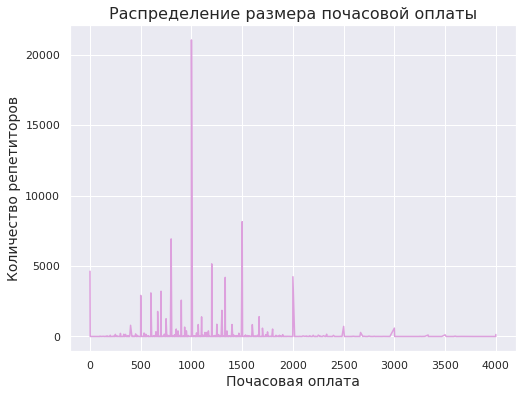

In [ ]:
title_ = 'Распределение размера почасовой оплаты'
xtitle_ = 'Почасовая оплата'
ytitle_ = 'Количество репетиторов'
plot_(np.sort(ind), edu_cash, 'plum', title_, xtitle_, ytitle_, [])

Основное число репетиторов устанавливает цену до 4 тысяч. 

In [ ]:
rat_cash = draw_df[draw_df['cash'] <= 10000].groupby(by='cash').mean()['rating']
ind = draw_df[draw_df['cash'] <= 10000]['cash'].unique()

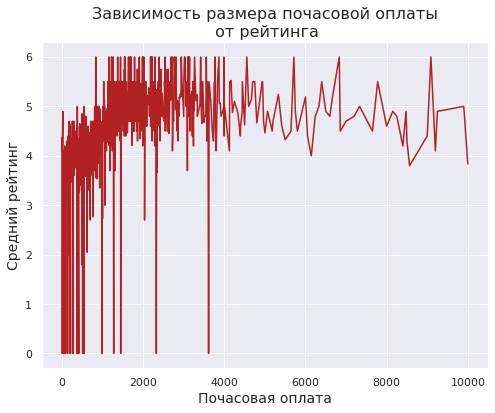

In [ ]:
title_ = 'Зависимость размера почасовой оплаты\n от рейтинга'
xtitle_ = 'Почасовая оплата'
ytitle_ = 'Средний рейтинг'
plot_(np.sort(ind), rat_cash, 'firebrick', title_, xtitle_, ytitle_, [])

Можем заметить, что есть возрастающий тренд в зависимости рейтинга от цены. При этом средний рейтинг 0 встречается в различных ценовых категориях, что однако не означает, что оценка от пользователя существует. Попробуем построить этот же горафик но без 0. 

In [ ]:
rat_cash0 = draw_df[(draw_df['rating'] != 0) & (draw_df['cash'] <= 10000)].groupby(by='cash').mean()['rating']
ind0 = draw_df[(draw_df['rating'] != 0) & (draw_df['cash'] <= 10000)]['cash'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


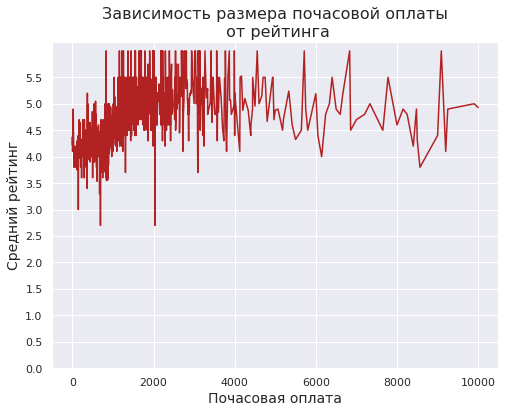

In [ ]:
title_ = 'Зависимость размера почасовой оплаты\n от рейтинга'
xtitle_ = 'Почасовая оплата'
ytitle_ = 'Средний рейтинг'
plot_(np.sort(ind0), rat_cash0, 'firebrick', title_, xtitle_, ytitle_, np.arange(0, 6, step=0.5))

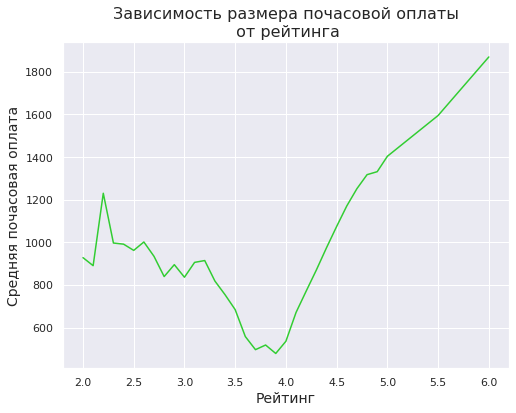

In [ ]:
rat_cash = draw_df[(draw_df['rating'] != 0) & (draw_df['cash'] <= 10000)].groupby(by='rating').mean()['cash']
ind0 = draw_df[(draw_df['rating'] != 0) & (draw_df['cash'] <= 10000)]['rating'].unique()

title_ = 'Зависимость размера почасовой оплаты\n от рейтинга'
ytitle_ = 'Средняя почасовая оплата'
xtitle_ = 'Рейтинг'
plot_(np.sort(ind0), rat_cash, 'limegreen', title_, xtitle_, ytitle_, [])

In [ ]:
print(draw_df['documents'][0])
mystr = draw_df['documents'][0]

['', 'Майский экспресс-тренинг для мини-групп', 'В гимназии г. Раменское', 'На семинаре для репетиторов', 'На семинаре для репетиторов', 'Занятия мини-группы', 'Майский экспресс-тренинг для мини-групп', 'Майский экспресс-тренинг для мини-групп']


In [ ]:
for i, doc in enumerate(draw_df['documents']):
    res = list(set(doc[1:-1].replace("'", "").split(',')))
    if '' in res:
        res.remove('')
    draw_df.loc[i, 'doc_count'] = len(res)

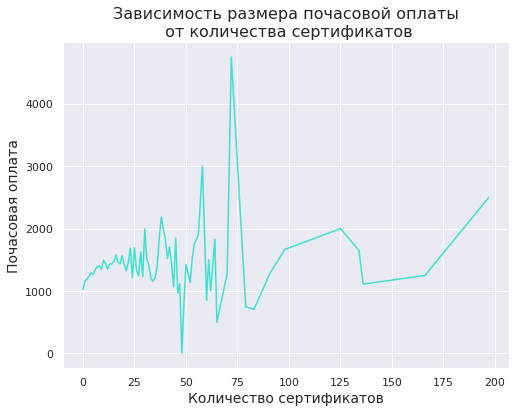

In [ ]:
doc_cash = draw_df[draw_df['cash'] <= 10000].groupby(by='doc_count').mean()['cash']
ind_doc = draw_df[draw_df['cash'] <= 10000]['doc_count'].unique()

title_ = 'Зависимость размера почасовой оплаты\n от количества сертификатов'
ytitle_ = 'Почасовая оплата'
xtitle_ = 'Количество сертификатов'
plot_(np.sort(ind_doc), doc_cash, 'turquoise', title_, xtitle_, ytitle_, [])

Но в сертификатах все что угодно от образования до олимпиады русский медвежонок. 

In [ ]:
uni_list = ['НИУ ВШЭ', 'МГУ им. М.В.Ломоносова', 'МФТИ', 'МГТУ им. Н.Э.Баумана', 
            'НИЯУ МИФИ', 'НИТУ МИСиС', 'Уральский федеральный университет имени Ельцина', 
            'Национальный исследовательский Томский политехнический университет', 'РЭУ имени Г.В. Плеханова',
            'Санкт-Петербургский горный университет', 'НИУ ИТМО', 'РЭШ', 
            'Финансовый университет при Правительстве Российской Федерации', 
            'РАНХиГС', 'Санкт-Петербургский политехнический университет Петра Великого', 'СПБГУ', 
            'Российский химико-технологический университет имени Д.И. Менделеева', 
            'Ярославский государственный технический университет', 'МЭИ', 
            'Балтийский государственный технический университет «ВОЕНМЕХ» им. Д.Ф. Устинова']

# Играюсь

In [5]:
g = pd.read_csv('repetitors_info.csv')
g

,Unnamed: 0,index,url,name,subjects,mainInfo,rating,cash,certification,discount,grayInfo,additionalInfo,awards,prices,documents,price_list,education,expirience,district,add
0,0,0,https://repetitors.info/repetitor/?p=Ovchinnik...,Овчинникова Ольга Валентиновна,"репетитор по химии,","['Образование:', '• Химический факультет МГУ и...",6.0,2000.0,1,NaN,"['Район: Менделеевская, Белорусская.', 'Плюс: ...",['• Авторская программа подготовки к ЕГЭ; подг...,"['О себе', '\nВ 1986 году окончила с отличием ...",['[Химия](/repetitor/chemistry/)\n\n| 2000-23...,"['', 'Майский экспресс-тренинг для мини-групп'...","{'Химия': ['2000 руб. / ч'], 'ДВИ по химии': [...",['Химический факультет МГУ им. М.В. Ломоносова...,"['Репетиторская деятельность (школьники, ЕГЭ, ...","[' Менделеевская, Белорусская.', 'Ставка: 2000...","['Плюс: дистанционные занятия.', 'ЕГЭ: 1000 ру..."
1,1,1,https://repetitors.info/repetitor/?p=UkolovIS,Уколов Игорь Сергеевич,"репетитор по математике,","['Образование:', '• МГУ им. М.В. Ломоносова, м...",6.0,1000.0,1,NaN,"['Сертификация по математике пройдена.', 'Райо...","['• Ведущий вебинара компании PROFI.RU: ""ЕГЭ п...","['КАК Я РАБОТАЮ.', '\nМои занятия проходят в г...",['[Математика](/repetitor/maths/)\n\n| 1000 р...,"['Уколов И.С.', 'Диплом победителя олимпиады П...","{'Математика': ['1000 руб. / ч'], 'Алгебра': [...","['МГУ им. М.В. Ломоносова, механико-математиче...",['Репетиторская деятельность — 12 лет.'],"[' Чистые пруды.', 'Ставка: 1000 руб. / ч']","['Сертификация по математике пройдена.', 'ЕГЭ ..."
2,2,2,https://repetitors.info/repetitor/?p=SolovkovDA,Соловков Дмитрий Андреевич,"репетитор по биологии,химии,","['Опыт:', '• Стаж педагогической деятельности ...",6.0,2000.0,1,NaN,"['Район: Серпуховская.', 'Плюс: внутренний экз...",['• Автор книги «ЕГЭ по биологии. Практическая...,"['О себе', '\nВ 1996 году окончил биолого-хими...",['[Биология](/repetitor/biology/)\n\n| 2000-2...,"['', '', '', '', '', '', '', '', '']","{'Биология': ['2000 руб. / ч'], 'ДВИ по биолог...",['Учитель высшей квалификационной категории.'],['Стаж педагогической деятельности — 23 года.'],"[' Серпуховская.', 'Ставка: 2000-2300 руб. / ч']",['Плюс: внутренний экзамен (ДВИ) по биологии в...
3,3,3,https://repetitors.info/repetitor/?p=ZobninAI,Зобнин Александр Игоревич,"репетитор по высшей математике,","['Образование:', '• МГУ им. М.В. Ломоносова, м...",6.0,1333.0,1,NaN,"['Сертификация по математике пройдена.', 'Райо...",['• Опыт преподавания – доцент кафедры математ...,[],['[Математика](/repetitor/maths/)\n\n| 1333 р...,[],"{'Математика': ['1333 руб. / ч'], 'Алгебра': [...","['МГУ им. М.В. Ломоносова, механико-математиче...",['Преподаватель кафедры высшей математики в Мо...,"[' Первомайская. Выезд: Восток.', 'Ставка: 133...","['Сертификация по математике пройдена.', 'Плюс..."
4,4,4,https://repetitors.info/repetitor/?p=ZemlyakovaEU,Землякова Екатерина Юрьевна,"репетитор по венгерскому языку,","['Образование:', '• Профессиональный институт ...",6.0,1500.0,1,NaN,"['Плюс: дистанционные занятия.', 'Ставка: 1500...","['• Носитель венгерского языка.', '\n• Жила и ...","['Имею опыт устного переводчика, опыт оформлен...","['Другие языки\n\n| — // —\n\n', '[Венгерский...","['', 'Участница программы «Полиглот» в телепер...","{'Другие языки': ['1333 руб. / ч'], 'Венгерски...","['Профессиональный институт управления, факуль...","['Опыт репетиторства — 11 лет.', 'Преподаёт в ...","['Ставка: 1500 руб. / ч', 'Мини-группа: 367 ру...","['Плюс: дистанционные занятия.', 'Носитель вен..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104759,104759,107770,https://repetitors.info/repetitor/?p=SidorkinaAA4,Сидоркина Анастасия Анатольевна,"предметы: математика, русский язык, начальная ...",['Студентка 3 курса МГТУ им. Н.Э. Баумана.'],2.9,660.0,0,NaN,"['Выезд: Центр, Юго-Восток, Запад, Юг, Юго-Зап...",[],[],['[Выгул собак](/predmet/vygul-sobak/)\n\n| —...,[],"{'Выгул собак': ['1000 руб. / ч'], 'Инженерия'...",['Студентка 3 курса МГТУ им. 

In [15]:
g.expirience[10060]

"['Опыт репетиторской деятельности — 24 года.', 'Социально-экономический колледж, преподаватель русского языка, заведующая по учебной работе, 1991–2004 гг.', 'Московский областной филиал Санкт-Петербургского гуманитарного университета профсоюзов, старший преподаватель — 15 лет.']"

In [ ]:
мб сделать кластеризацию и уже тогда каждый вектор из раздела сравнивать ???